In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle

In [8]:
con_table = np.array([[60, 15],[10, 15]])
tp = con_table[0][0]
tn = con_table[1][1]
fp = con_table[1][0]
fn = con_table[0][1]
pos = np.sum(con_table[0])
neg = np.sum(con_table[1])
tpr = tp / pos
tnr = tn / neg
fpr = fp / neg
fnr = fn / pos
total = np.sum(con_table)
pos_prop = pos / total
neg_prop = neg / total

In [9]:
accuracy = (tp + tn) / total
print('accuracy1 = ', accuracy)
accuracy = pos_prop * tpr + neg_prop * tnr
print('accuracy2 = ', accuracy)

accuracy1 =  0.75
accuracy2 =  0.7500000000000001


In [10]:
err_rate = (fp + fn) / total
print('error rate = ', err_rate)
err_rate = 1 - accuracy
print('error rate 2 = ', err_rate)

error rate =  0.25
error rate 2 =  0.2499999999999999


In [11]:
precision = tp / (tp + fp)
print('precision/confidence = ', precision)

precision/confidence =  0.8571428571428571


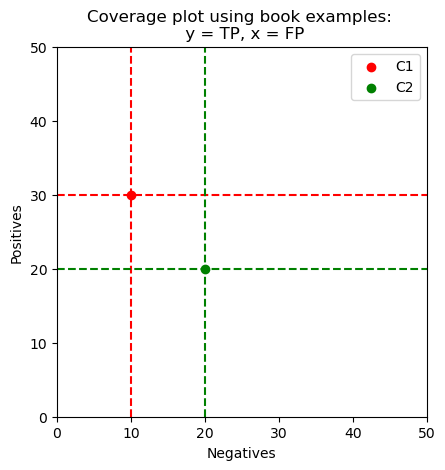

In [12]:

xpoints = np.array([0, 50])
ypoints = np.array([0, 50])

plt.xlim(xpoints)
plt.ylim(ypoints)
plt.gca().set_aspect('equal')
plt.scatter(10, 30, c='red', label='C1')
plt.scatter(20, 20, c='green', label='C2')
plt.axhline(y = 30, c='red', ls = '--')
plt.axvline(x = 10, c='red', ls = '--')
plt.axhline(y = 20, c='green', ls = '--')
plt.axvline(x = 20, c='green', ls = '--')
plt.title("Coverage plot using book examples: \n y = TP, x = FP")
plt.xlabel('Negatives')
plt.ylabel('Positives')
plt.legend()
plt.show()

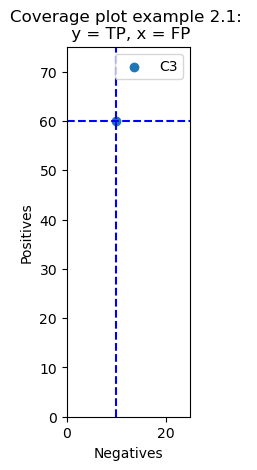

In [13]:
plt.xlim(0, 25)
plt.ylim(0, 75)
plt.scatter(fp, tp, label='C3')
plt.axhline(y = tp, c='blue', ls = '--')
plt.axvline(x = fp, c='blue', ls = '--')
plt.gca().set_aspect('equal')
plt.title("Coverage plot example 2.1: \n y = TP, x = FP")
plt.xlabel('Negatives')
plt.ylabel('Positives')
plt.legend()
plt.show()

The following output shows that the accuracy is the same for C1 and C3. Because the slope of the line is 1, we can imagine gaining a TP and a FP as we step up the line. Gaining an FP is the same as losing a TN.

normalized true positives =  40.0
normalized false positives =  20.0


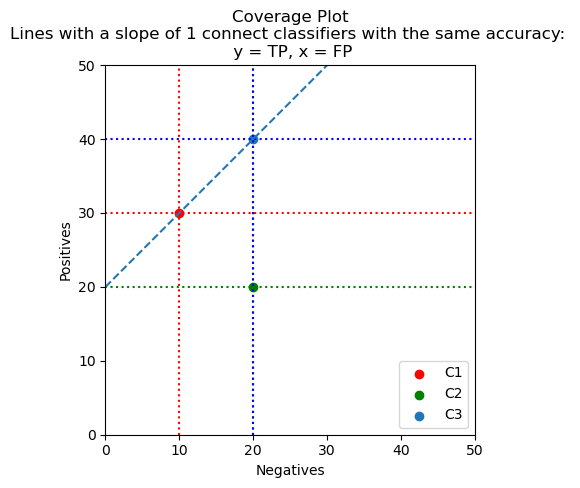

In [14]:
# Normalising to get coverage plot

tp_norm = tpr * 50
fp_norm = fp / neg * 50

print('normalized true positives = ', tp_norm)
print('normalized false positives = ', fp_norm)

xpoints = np.array([0, 50])
ypoints = np.array([0, 50])

plt.xlim(xpoints)
plt.ylim(ypoints)
plt.gca().set_aspect('equal')

plt.scatter(10, 30, c='red', label='C1')
plt.scatter(20, 20, c='green', label='C2')
plt.axhline(y = 30, c='red', ls = ':')
plt.axvline(x = 10, c='red', ls = ':')
plt.axhline(y = 20, c='green', ls = ':')
plt.axvline(x = 20, c='green', ls = ':')

plt.scatter(fp_norm, tp_norm, label='C3')
plt.axhline(y = tp_norm, c='blue', ls = ':')
plt.axvline(x = fp_norm, c='blue', ls = ':')

x = np.linspace(0, 100)
plt.plot(x, x+20, ls='--')

plt.title("Coverage Plot\nLines with a slope of 1 connect classifiers with the same accuracy: \n y = TP, x = FP")
plt.xlabel('Negatives')
plt.ylabel('Positives')
plt.legend()
plt.show()

When we normalize values between 0 and 1, we lose the class distribution and so the diagonal line changes meaning as we cannot calculate the accuracy without the class distribution. In a ROC plot it means average recall - average recall being (tpr + tnr) / 2 as tpr and tnr are both examples of recall.

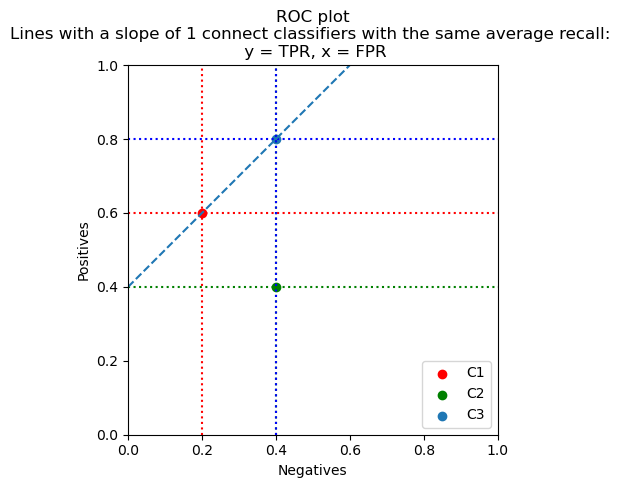

In [15]:
# ROC plot to in stead use rates on scale 0 to 1

plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().set_aspect('equal')

c1_tpr = 30 / 50
c1_fpr = 10 / 50

c2_tpr = 20 / 50
c2_fpr = 20 / 50

plt.scatter(c1_fpr, c1_tpr, c='red', label='C1')
plt.scatter(c2_fpr, c2_tpr, c='green', label='C2')
plt.axhline(y = c1_tpr, c='red', ls = ':')
plt.axvline(x = c1_fpr, c='red', ls = ':')
plt.axhline(y = c2_tpr, c='green', ls = ':')
plt.axvline(x = c2_fpr, c='green', ls = ':')

plt.scatter(fpr, tpr, label='C3')
plt.axhline(y = tpr, c='blue', ls = ':')
plt.axvline(x = fpr, c='blue', ls = ':')

x = np.linspace(0, 100)
plt.plot(x, x+0.4, ls='--')

plt.title("ROC plot\nLines with a slope of 1 connect classifiers with the same average recall: \n y = TPR, x = FPR")
plt.xlabel('Negatives')
plt.ylabel('Positives')
plt.legend()
plt.show()

### Binary classification tree

In [16]:
# Using book page 62

# Feature tree
# Score calculated using the log base 2 of the class ratio as scores
# Has no immediate value

class Node:
   def __init__(self, data):
      self.left = None
      self.right = None
      self.data = data
   def PrintNode(self):
      print(self.data)

class Leaf:
    def __init__(self, spam, ham):
        self.spam = spam
        self.ham = ham
        self.score = np.log2(spam/ham)
    def PrintLeaf(self):
        print(self.spam)
        print(self.ham)

root = Node('Viagra')
root.left = Node('lottery')
root.right = Leaf(20, 5)
root.left.left = Leaf(20, 40)
root.left.right = Leaf(10, 5)

print(np.log2(1))



0.0


Margin is the true class (-1 or 1) multiplied by score.

Loss fucntions map the margin to an associated loss

The margin is 0 when the spam and ham examples in a leaf are equal (log2(1) = 0)

The 0-1 loss fn just counts the number of misclassified test examples

Ranking errors are when we rank a value v1 higher than v2, but v1 is a negative and v2 is a positive. The max number of ranking errors are pos * neg. 



In [17]:
# Created data in CSV cols are spam, viagra, lottery

data = np.genfromtxt("ranking.csv", delimiter=',')

print(data[:10])


[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]


In [18]:
# log2(spam/ham)

def get_score(x):
    # Contains viagra
    if(x[1] == 1):
        return 2
    # Contains lottery
    elif(x[2] == 1):
        return 1
    # Contains neither
    else:
        return -1

In [19]:
# Calculating the ranking stats using formula page 64


rank_err = 0

for i in range(50):
    for j in range(50, 100):
        score_i = get_score(data[i])
        score_j = get_score(data[j])
        if(score_i < score_j):
            rank_err += 1
        elif(score_i == score_j):
            rank_err += 0.5

rank_err = rank_err / (50 * 50) # Dividing by Pos*Neg

print('ranking error rate = ', rank_err)
print('Ranking accuracy = ', 1 - rank_err)

ranking error rate =  0.29
Ranking accuracy =  0.71


The following coverage plot shows the accuracy of the binary classifier by representing each possible unique pair of positive and negative examples with the cells of the grid. The green represent correct estimations, the red represent errors, and the yellow represent ties that lie on the decision boundary which we previously calculated as half errors.

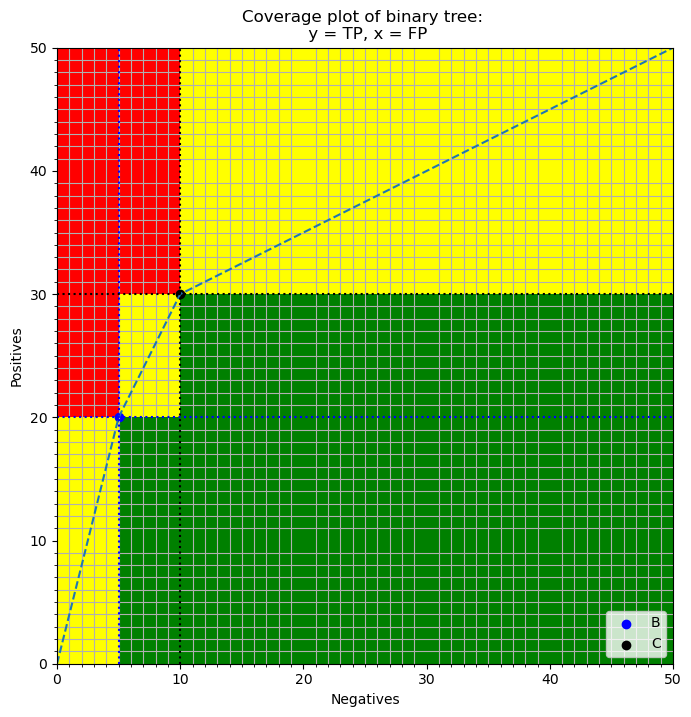

In [30]:
xpoints = np.array([0, 50])
ypoints = np.array([0, 50])

plt.xlim(xpoints)
plt.ylim(ypoints)
plt.gca().set_aspect('equal')
bx = 5
by = 20
cx = 10
cy = 30
x = [0, bx, cx, 50]
y = [0, by, cy, 50]
ax = plt.subplot()
plt.fill_between(x, y, color='green')
plt.fill_between(x, y, 100, facecolor='red')
ax.add_patch(Rectangle((0,0),bx,by, facecolor='yellow'))
ax.add_patch(Rectangle((bx,by),cx-bx,cy-by, facecolor='yellow'))
ax.add_patch(Rectangle((cx,cy),50,50, facecolor='yellow'))
#plt.fill_between([bx, cx],[by,cy],color='yellow')
plt.plot(x, y, ls='--')
plt.scatter(bx, by, c='blue', label='B')
plt.scatter(cx, cy, c='black', label='C')
plt.axhline(y = by, c='blue', ls = ':')
plt.axvline(x = bx, c='blue', ls = ':')
plt.axhline(y = cy, c='black', ls = ':')
plt.axvline(x = cx, c='black', ls = ':')
plt.title("Coverage plot of binary tree: \n y = TP, x = FP")
plt.xlabel('Negatives')
plt.ylabel('Positives')
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(True, 'minor')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)

plt.show()

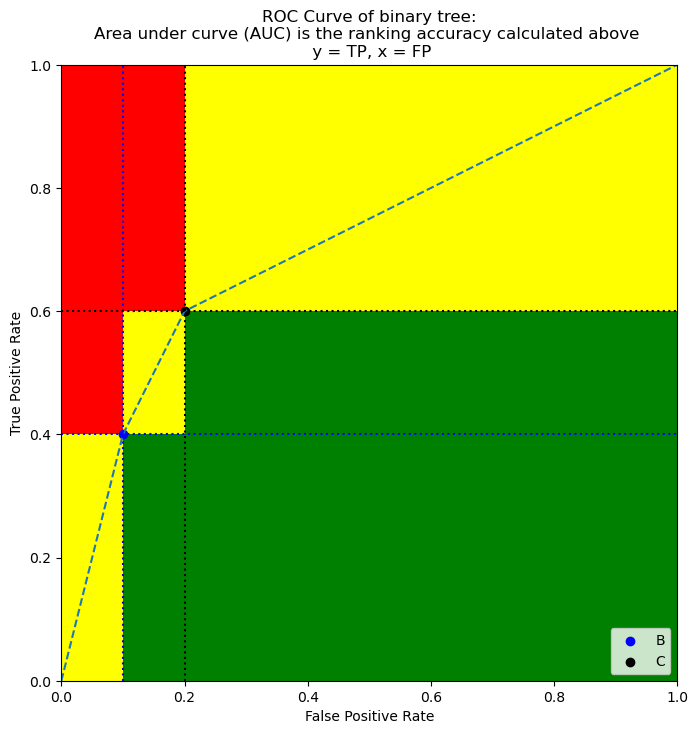

In [31]:
# Normalizing previous coverage plot into ROC curve

xpoints = np.array([0, 1])
ypoints = np.array([0, 1])

plt.xlim(xpoints)
plt.ylim(ypoints)
plt.gca().set_aspect('equal')
bx = 5/50
by = 20/50
cx = 10/50
cy = 30/50
x = [0, bx, cx, 1]
y = [0, by, cy, 1]
ax = plt.subplot()
plt.fill_between(x, y, color='green')
plt.fill_between(x, y, 100, facecolor='red')
ax.add_patch(Rectangle((0,0),bx,by, facecolor='yellow'))
ax.add_patch(Rectangle((bx,by),cx-bx,cy-by, facecolor='yellow'))
ax.add_patch(Rectangle((cx,cy),1,1, facecolor='yellow'))
plt.plot(x, y, ls='--')
plt.scatter(bx, by, c='blue', label='B')
plt.scatter(cx, cy, c='black', label='C')
plt.axhline(y = by, c='blue', ls = ':')
plt.axvline(x = bx, c='blue', ls = ':')
plt.axhline(y = cy, c='black', ls = ':')
plt.axvline(x = cx, c='black', ls = ':')
plt.title("ROC Curve of binary tree:\nArea under curve (AUC) is the ranking accuracy calculated above \n y = TP, x = FP")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.rcParams["figure.figsize"] = (8,8)

plt.show()

In [58]:
# Coverage plot of linear classifier

p = [0,1,2,3,4]
n = [5,6,7,8,9]

r_hat = np.array([p[0],p[1],p[2],n[0],p[3],n[1],n[2],p[4],n[3],n[4]])

rank_err = 0
for i in range(5):
    for j in range(5, 10):
        if np.where(r_hat == i) > np.where(r_hat == j):
                rank_err += 1
print('Raw errors = ', rank_err)

rank_err = rank_err / (5*5) # Dividing by Pos*Neg

print('Rank error = ', rank_err)
print('Rank accuracy = ', 1 - rank_err)

# Accuracy
pos_prop = 5/10
tpr = 4/5
neg_prop = 5/10
tnr = 4/5
accuracy = pos_prop * tpr + neg_prop * tnr

print('Accuracy = ', accuracy)

Raw errors =  4
Rank error =  0.16
Rank accuracy =  0.84
Accuracy =  0.8


The coverage plot below has onlyvertical and horizontal lines because there are no ties. The ties would usually cause a proportion of the cells to be classified one way or the other at a rate defined by the "reciprocal of the class ratio" - meaning neg/pos. The coverage plots for linear classifiers have one segment for each example in the dataset. This is not clear from the plot below but it basically means that you could decide to put the line anywhere on the graph and therefore get any level of accuracy below the max possible in the example.

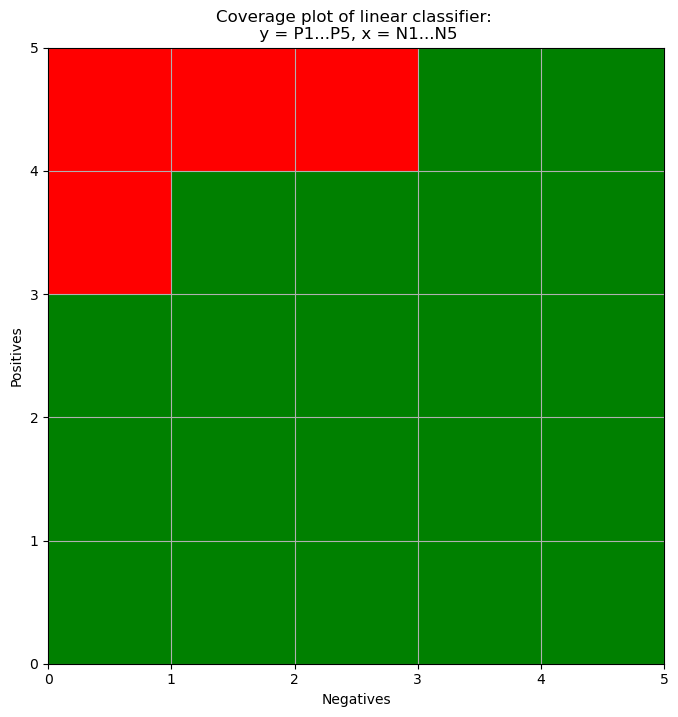

In [40]:
plt.xlim(np.array([0,5]))
plt.ylim(np.array([0,5]))
plt.gca().set_aspect('equal')

ax = plt.subplot()
ax.add_patch(Rectangle((0,0),5,3, facecolor='green'))
ax.add_patch(Rectangle((1,3),5,1, facecolor='green'))
ax.add_patch(Rectangle((3,4),2,1, facecolor='green'))
ax.add_patch(Rectangle((0,3),1,2, facecolor='red'))
ax.add_patch(Rectangle((1,4),2,1, facecolor='red'))
#plt.plot([0,5],[0,5])
plt.title("Coverage plot of linear classifier: \n y = P1...P5, x = N1...N5")
plt.xlabel('Negatives')
plt.ylabel('Positives')


plt.grid()
plt.rcParams["figure.figsize"] = (8,8)

plt.show()

In [59]:
# Introducing ties

# Using boundaries A,B,C defined on page 68 to create four segments

p = [0,1,2,3,4]
n = [5,6,7,8,9]

r_hat = np.array([p[0],p[1],p[2],n[0],p[3],n[1],n[2],p[4],n[3],n[4]])

rank_err = 0
for i in range(3):
    for j in range(3, 10):
        if np.where(r_hat == i) > np.where(r_hat == j):
                rank_err += 1
print('Raw errors = ', rank_err)

rank_err = rank_err / (5*5) # Dividing by Pos*Neg

print('Rank error = ', rank_err)
print('Rank accuracy = ', 1 - rank_err)

Raw errors =  0
Rank error =  0.0
Rank accuracy =  1.0


[0 1]


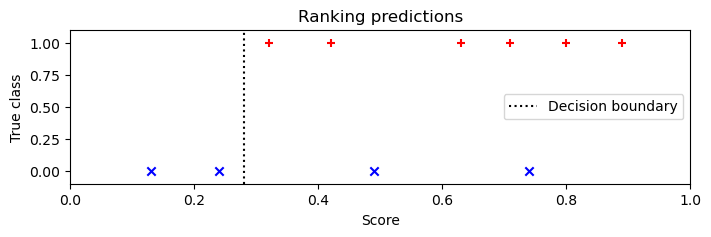

In [73]:
# Example 2.5

classes = [1,1,0,1,1,0,1,1,0,0]
rankings = [0.89, 0.8, 0.74, 0.71, 0.63, 0.49, 0.42, 0.32, 0.24, 0.13]

p_p = []

p_n = []

for i in range(10):
    if classes[i] == 1:
        p_p.append(rankings[i])
    else:
        p_n.append(rankings[i])

print(ypoints)

xpoints = np.array([0, 1])
ypoints = np.array([0, 1])

plt.xlim(xpoints)
plt.ylim([-0.1, 1.1])

plt.scatter(p_p, [1,1,1,1,1,1], c='red', marker='+')
plt.scatter(p_n, [0,0,0,0], c='blue', marker = 'x')
plt.axvline(x = 0.28, c='black', ls = ':', label='Decision boundary')

plt.title("Ranking predictions")
plt.xlabel('Score')
plt.ylabel('True class')
plt.rcParams["figure.figsize"] = (8,2)
plt.legend()
plt.show()


In [74]:
pos_prop = 6/10
tpr = 6/6
neg_prop = 4/10
tnr = 2/4
accuracy = pos_prop * tpr + neg_prop * tnr

# Somehow, if we were to generate the ROC plot of this and intersect the 2/3 slope (reciprocal class distribution) with the decending diagonal (line from point 0,1 to
# 1,0) and read out the value on the Y axis we get the accuracy of the model.

print('accuracy = ', accuracy)

accuracy =  0.8


[0 1]


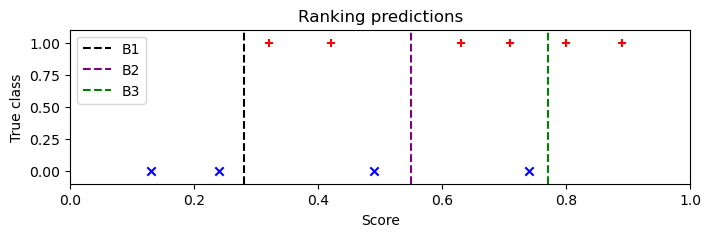

In [79]:
classes = [1,1,0,1,1,0,1,1,0,0]
rankings = [0.89, 0.8, 0.74, 0.71, 0.63, 0.49, 0.42, 0.32, 0.24, 0.13]

p_p = []

p_n = []

for i in range(10):
    if classes[i] == 1:
        p_p.append(rankings[i])
    else:
        p_n.append(rankings[i])

print(ypoints)

xpoints = np.array([0, 1])
ypoints = np.array([0, 1])

plt.xlim(xpoints)
plt.ylim([-0.1, 1.1])

plt.scatter(p_p, [1,1,1,1,1,1], c='red', marker='+')
plt.scatter(p_n, [0,0,0,0], c='blue', marker = 'x')
plt.axvline(x = 0.28, c='black', ls = '--', label='B1')
plt.axvline(x = 0.55, c='purple', ls = '--', label='B2')
plt.axvline(x = 0.77, c='green', ls = '--', label='B3')

plt.title("Ranking predictions")
plt.xlabel('Score')
plt.ylabel('True class')
plt.rcParams["figure.figsize"] = (8,2)
plt.legend()
plt.show()

In [80]:
pos_prop = 6/10
tpr = 6/6
neg_prop = 4/10
tnr = 2/4
accuracy = pos_prop * tpr + neg_prop * tnr

print('B1 accuracy = ', accuracy)

tpr = 4/6
tnr = 3/4
accuracy = pos_prop * tpr + neg_prop * tnr

print('B2 accuracy = ', accuracy)

tpr = 2/6
tnr = 4/4
accuracy = pos_prop * tpr + neg_prop * tnr

print('B2 accuracy = ', accuracy)

B1 accuracy =  0.8
B2 accuracy =  0.7
B2 accuracy =  0.6
